In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as patches

In [3]:
# Importamos los resultados en un DataFrame
df = pd.read_json("Results/resultados.json")
df

,win_rate,temperature_dda,moves_per_game,winner,opponent_name,first_player
0,1.000000,1.600000,10,agent,ChildPlayer,opponent
1,1.000000,2.100000,14,agent,ChildPlayer,opponent
2,1.000000,2.600000,8,agent,ChildPlayer,opponent
3,1.000000,3.100000,30,agent,ChildPlayer,opponent
4,1.000000,3.600000,10,agent,ChildPlayer,opponent
...,...,...,...,...,...,...
1195,0.505102,3.228687,20,agent,AdultSmarterPlayer,opponent
1196,0.502538,3.233789,25,opponent,AdultSmarterPlayer,opponent
1197,0.500000,3.236327,25,opponent,AdultSmarterPlayer,opponent
1198,0.497487,3.236327,17,opponent,AdultSmarterPlayer,opponent


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   win_rate         1200 non-null   float64
 1   temperature_dda  1200 non-null   float64
 2   moves_per_game   1200 non-null   int64  
 3   winner           1200 non-null   object 
 4   opponent_name    1200 non-null   object 
 5   first_player     1200 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 56.4+ KB


In [5]:
df.describe()

,win_rate,temperature_dda,moves_per_game
count,1200.000000,1200.000000,1200.000000
mean,0.537536,6.305527,21.959167
std,0.100369,7.900510,8.985532
min,0.000000,0.615441,7.000000
25%,0.476108,2.489308,15.000000
50%,0.514822,3.236327,21.000000
75%,0.571429,5.208638,28.000000
max,1.000000,37.663600,42.000000


In [6]:
for opponent in df['opponent_name'].unique():
    print(opponent)

ChildPlayer
ChildSmarterPlayer
TeenagerPlayer
TeenagerSmarterPlayer
AdultPlayer
AdultSmarterPlayer


# Evolución win rate y temperature

In [7]:
# Obtenemos número de partidas jugadas por cada oponente
num_games = int(df.shape[0]/df['opponent_name'].nunique())
num_games

200

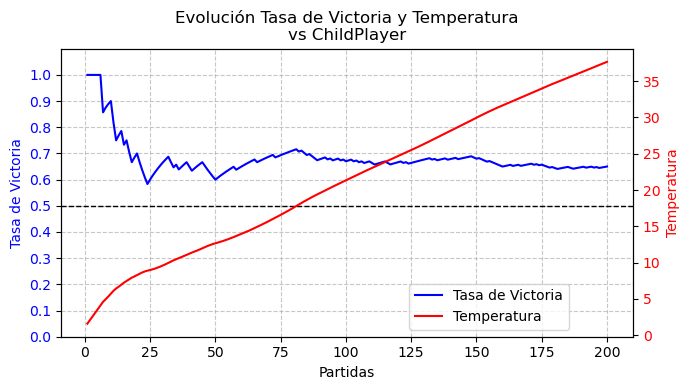

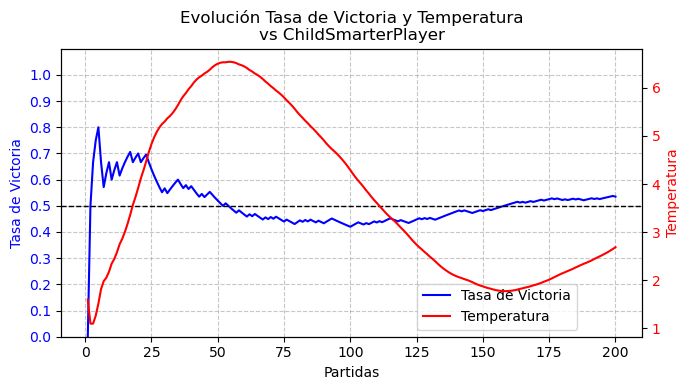

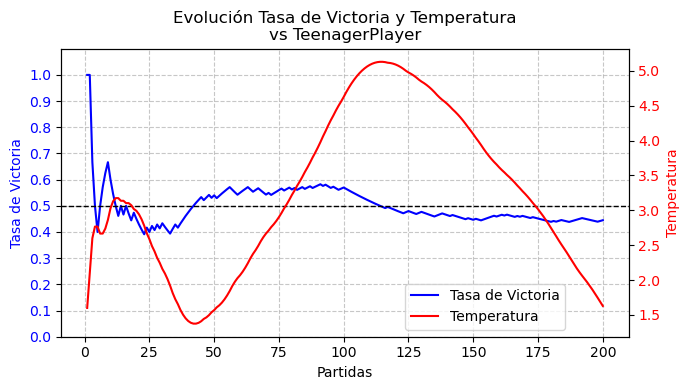

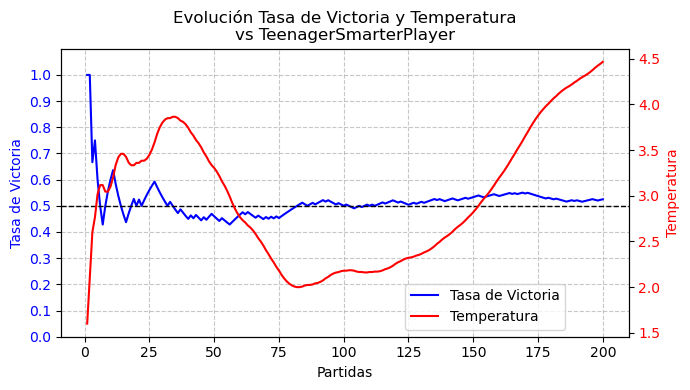

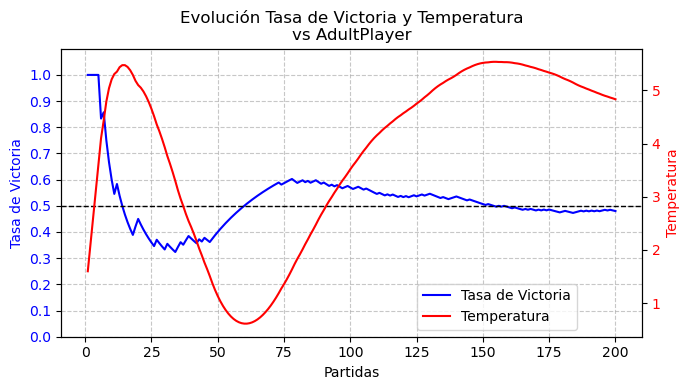

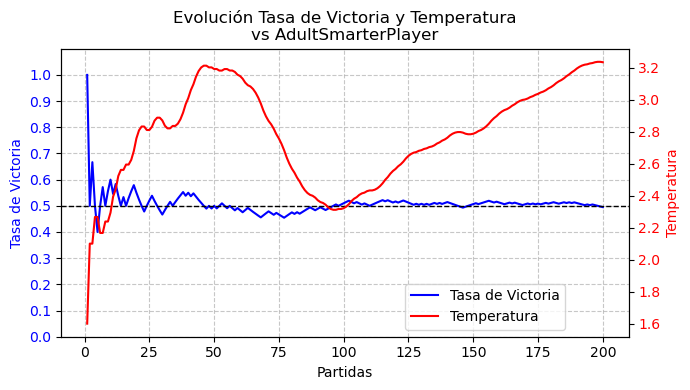

In [12]:
for opponent in df['opponent_name'].unique():
    # Crear figura y primer eje Y
    fig, ax1 = plt.subplots(figsize=(7, 4))

    ax1.set_xlabel("Partidas")
    ax1.set_ylabel("Tasa de Victoria", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")
    ax1.set_ylim(0, 1.1)
    ax1.set_yticks(np.arange(0, 1.1, 0.1))
    ax1.grid(True, which='major', axis='both', linestyle='--', alpha=0.7)
    line1, = ax1.plot(list(range(1, num_games+1)), df[df['opponent_name']==opponent]['win_rate'], label="Tasa de Victoria", color="blue")

    # Segundo eje Y (temperatura)
    ax2 = ax1.twinx()
    ax2.set_ylabel("Temperatura", color="red")
    ax1.axhline(y=0.5, color='black', linestyle='--', linewidth=1, label='Target 50%')
    line2, = ax2.plot(list(range(1, num_games+1)), df[df['opponent_name']==opponent]['temperature_dda'], label="Temperatura", color="red")
    ax2.tick_params(axis="y", labelcolor="red")
    #ax2.set_ylim(0, 1.2)

    # Título y grilla
    plt.title(f"Evolución Tasa de Victoria y Temperatura\nvs {opponent}")

    # Combinar las leyendas de ambos ejes
    lines = [line1, line2]
    labels = [line.get_label() for line in lines]
    ax1.legend(lines, labels, loc="lower right", bbox_to_anchor=(0.9, 0))

    fig.tight_layout()

    # Mostrar gráfico
    plt.show()

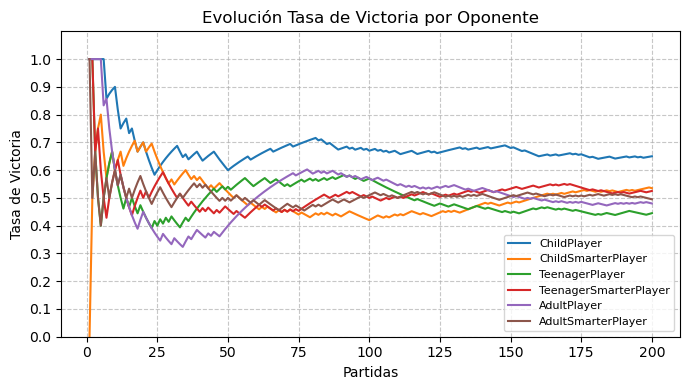

In [16]:
fig = plt.subplots(figsize=(7, 4))

for opponent in df['opponent_name'].unique():
    plt.plot(list(range(1, num_games+1)), df[df['opponent_name']==opponent]['win_rate'], label=opponent)

plt.title("Evolución Tasa de Victoria por Oponente")
plt.xlabel("Partidas")
plt.ylabel("Tasa de Victoria")
plt.ylim(0, 1.1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=8, loc="lower right")
plt.tight_layout()
plt.show()

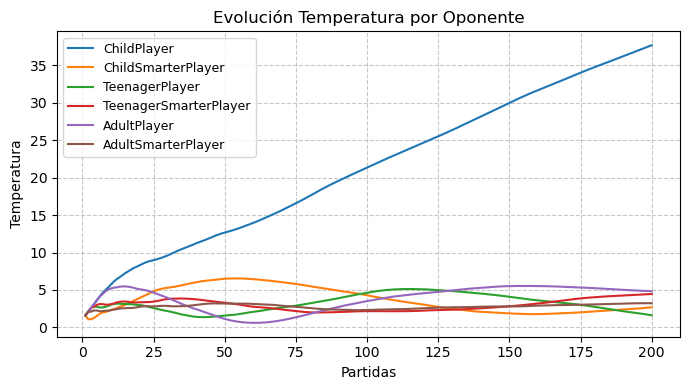

In [15]:
fig = plt.subplots(figsize=(7, 4))

for opponent in df['opponent_name'].unique():
    plt.plot(list(range(1, num_games+1)), df[df['opponent_name']==opponent]['temperature_dda'], label=opponent)

plt.title("Evolución Temperatura por Oponente")
plt.xlabel("Partidas")
plt.ylabel("Temperatura")
#plt.ylim(0, 1.1)
#plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=9, loc="upper left")
plt.tight_layout()
plt.show()

# Movimientos por partida

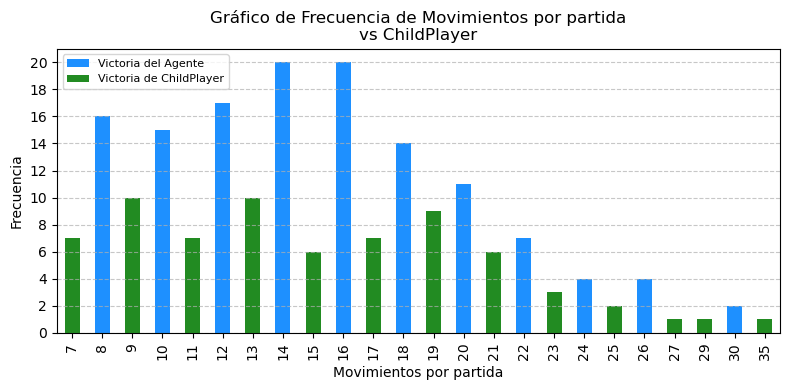

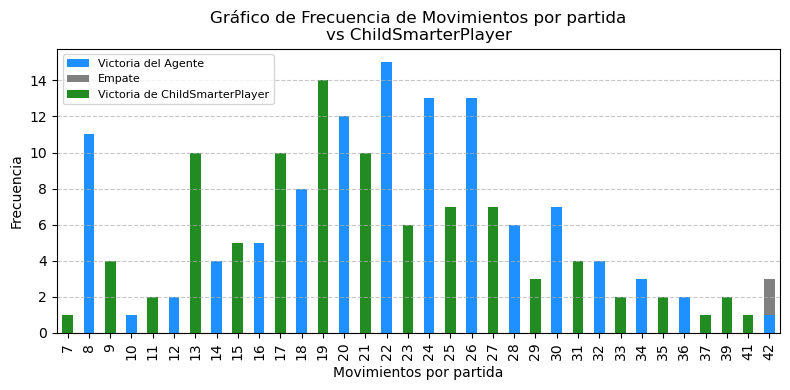

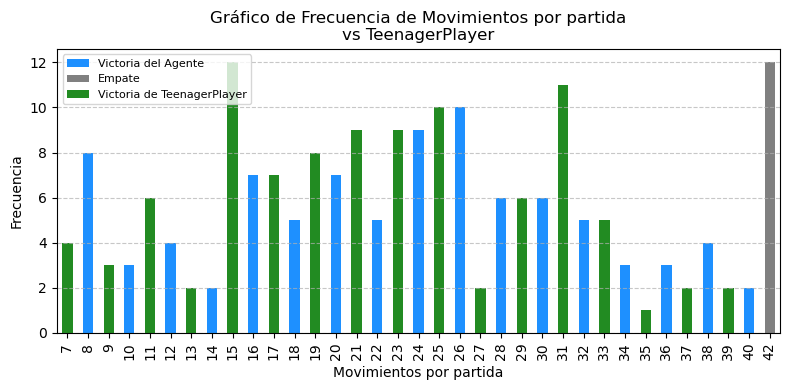

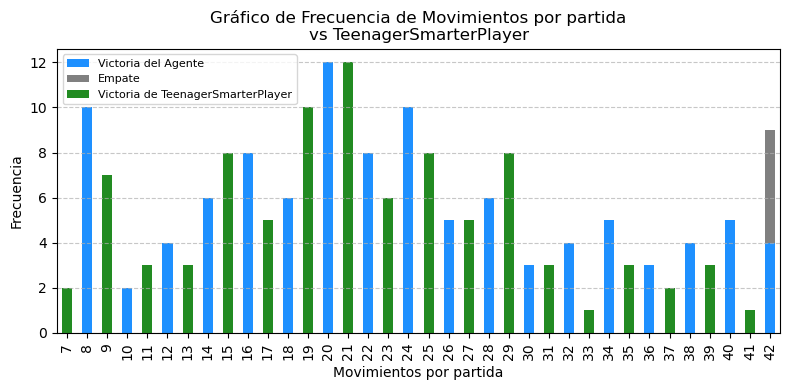

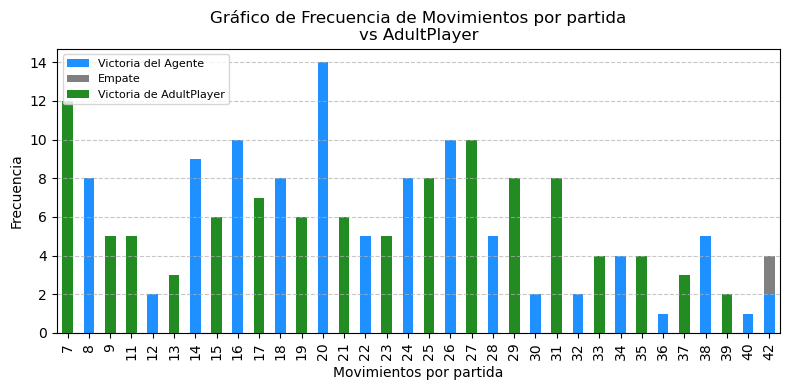

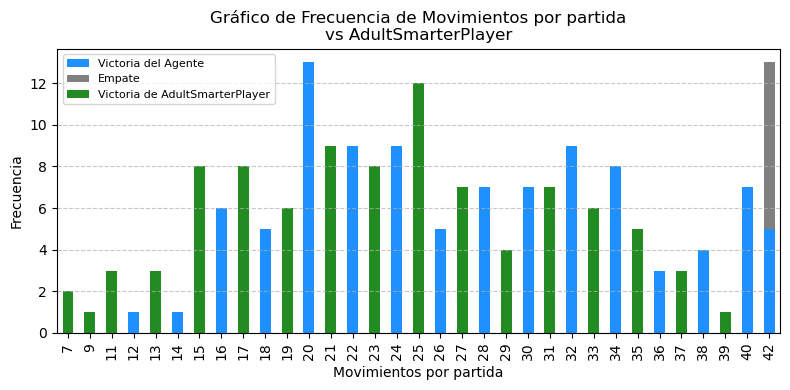

In [20]:
from matplotlib.ticker import MultipleLocator

for opponent in df['opponent_name'].unique():
    # Gráfico apilado
    df_aux = df[df['opponent_name']==opponent].groupby(["moves_per_game", "winner"]).size().unstack(fill_value=0)

    if df_aux.shape[1] == 3:
        df_aux.plot(kind="bar", stacked=True, figsize=(8, 4), color=["dodgerblue", "grey", "forestgreen"])
        plt.legend(labels=["Victoria del Agente", "Empate", f"Victoria de {opponent}"], loc="upper left", fontsize=8)
    elif df_aux.shape[1] == 2:
        df_aux.plot(kind="bar", stacked=True, figsize=(8, 4), color=["dodgerblue", "forestgreen"])
        plt.legend(labels=["Victoria del Agente", f"Victoria de {opponent}"], loc="upper left", fontsize=8)

    plt.title(f"Gráfico de Frecuencia de Movimientos por partida\nvs {opponent}")
    plt.xlabel("Movimientos por partida")
    plt.ylabel("Frecuencia")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.gca().yaxis.set_major_locator(MultipleLocator(2))
    plt.tight_layout()
    plt.show()

C:\Users\alber\AppData\Local\Temp\ipykernel_186340\2104860788.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[(df['opponent_name']==opponent) & (df['winner']!='draw')],
C:\Users\alber\AppData\Local\Temp\ipykernel_186340\2104860788.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[(df['opponent_name']==opponent) & (df['winner']!='draw')],
C:\Users\alber\AppData\Local\Temp\ipykernel_186340\2104860788.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[(df['opponent_name']==opponent) & (df['winner']!='draw')],
C:\U

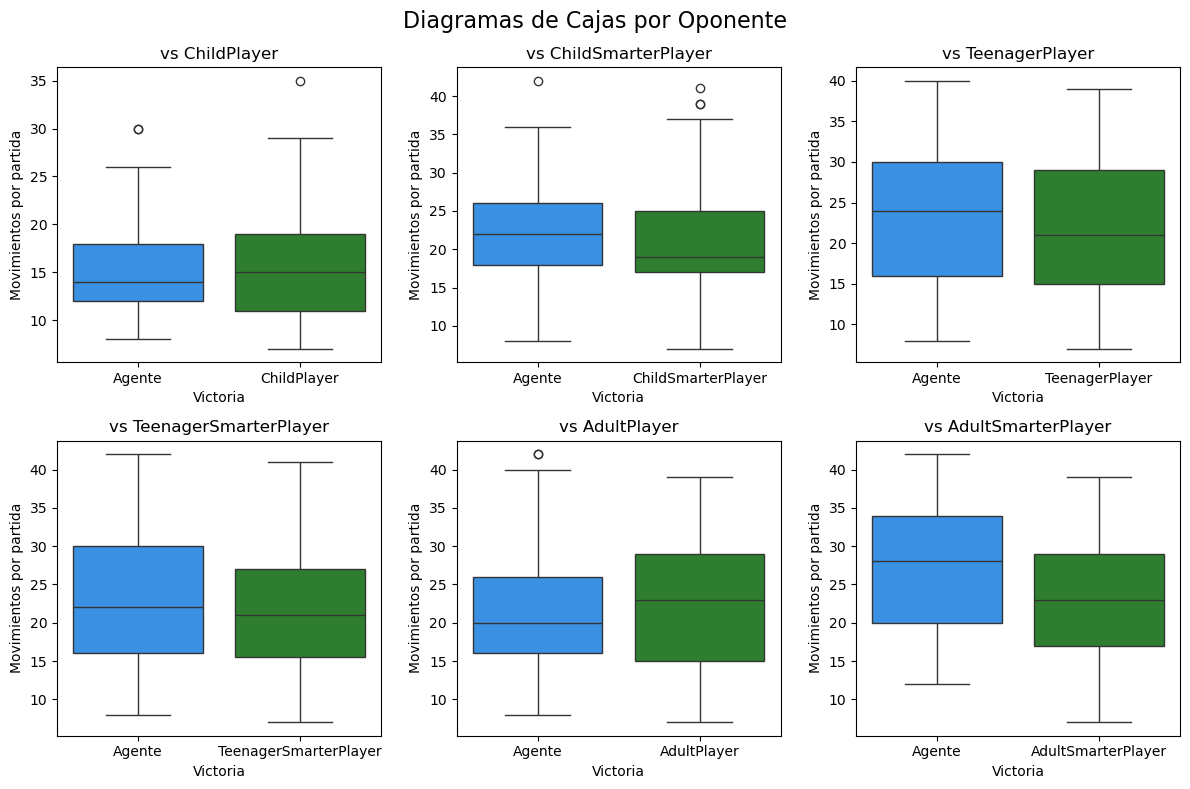

In [172]:
# Crear figura y ejes (2 filas x 3 columnas)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()  # Para iterar fácilmente

for i, opponent in enumerate(df['opponent_name'].unique()):
    ax = axes[i]

    # Crear boxplot
    sns.boxplot(data=df[(df['opponent_name']==opponent) & (df['winner']!='draw')],
                y='moves_per_game',
                x='winner',
                palette=['dodgerblue', 'forestgreen'],
                order=['agent', 'opponent'],
                ax=ax)
    
    # Cambiar etiquetas del eje X
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Agente', opponent])

    ax.set_title(f"vs {opponent}")
    ax.set_xlabel("Victoria")
    ax.set_ylabel("Movimientos por partida")

# Ajustar diseño
fig.suptitle("Diagramas de Cajas por Oponente", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Promedio de movimientos por partida para victoria del agente
df[df['winner']=='agent'].groupby('opponent_name')['moves_per_game'].mean().reindex(['ChildPlayer',
                                                                                     'ChildSmarterPlayer',
                                                                                     'TeenagerPlayer',
                                                                                     'TeenagerSmarterPlayer',
                                                                                     'AdultPlayer',
                                                                                     'AdultSmarterPlayer'])

opponent_name
ChildPlayer              15.138462
ChildSmarterPlayer       21.906542
TeenagerPlayer           23.011236
TeenagerSmarterPlayer    23.219048
AdultPlayer              21.979167
AdultSmarterPlayer       27.595960
Name: moves_per_game, dtype: float64

In [51]:
# Partidas ganadas por oponentes consideradas como que "el agente se ha dejado ganar"
df[(df['winner']=='opponent') &
   (df['moves_per_game']>=7) &
   (df['moves_per_game']<=11)].groupby('opponent_name')['moves_per_game'].size().reindex(['ChildPlayer',
                                                                                     'ChildSmarterPlayer',
                                                                                     'TeenagerPlayer',
                                                                                     'TeenagerSmarterPlayer',
                                                                                     'AdultPlayer',
                                                                                     'AdultSmarterPlayer'])

opponent_name
ChildPlayer              24
ChildSmarterPlayer        7
TeenagerPlayer           13
TeenagerSmarterPlayer    12
AdultPlayer              22
AdultSmarterPlayer        6
Name: moves_per_game, dtype: int64

In [50]:
# Porcentaje de partidas ganadas por oponentes consideradas como que "el agente se ha dejado ganar"
df[(df['winner']=='opponent') &
   (df['moves_per_game']>=7) &
   (df['moves_per_game']<=11)].groupby('opponent_name')['moves_per_game'].size().reindex(['ChildPlayer',
                                                                                     'ChildSmarterPlayer',
                                                                                     'TeenagerPlayer',
                                                                                     'TeenagerSmarterPlayer',
                                                                                     'AdultPlayer',
                                                                                     'AdultSmarterPlayer'])/num_games

opponent_name
ChildPlayer              0.120
ChildSmarterPlayer       0.035
TeenagerPlayer           0.065
TeenagerSmarterPlayer    0.060
AdultPlayer              0.110
AdultSmarterPlayer       0.030
Name: moves_per_game, dtype: float64

# % Victorias

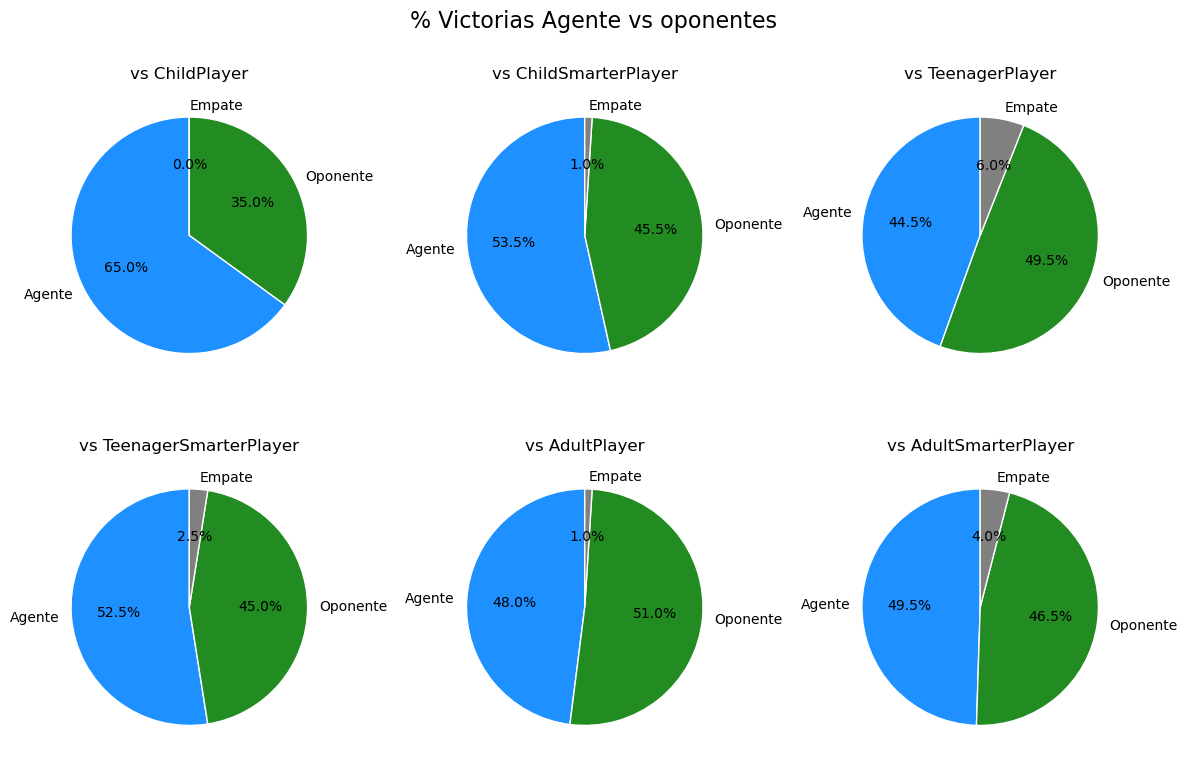

In [159]:
# Crear figura con 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("% Victorias Agente vs oponentes", fontsize=16)

# Aplanar ejes para iterar fácilmente
axes = axes.flatten()

for i, opponent in enumerate(df['opponent_name'].unique()):
    df_aux = df[df['opponent_name']==opponent]['winner'].value_counts(normalize=True).reindex(['agent', 'opponent', 'draw']).replace(np.nan, 0)

    if df_aux.shape[0] == 3:
        axes[i].pie(df_aux, labels=['Agente', 'Oponente', 'Empate'], colors=['dodgerblue', 'forestgreen', 'grey'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(edgecolor='white'))
    elif df_aux.shape[0] == 2:
        axes[i].pie(df_aux, labels=['Agente', 'Oponente'], colors=['dodgerblue', 'forestgreen'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(edgecolor='white'))
    
    axes[i].set_title(f"vs {opponent}")

# Ajustar diseño
plt.tight_layout()
plt.show()

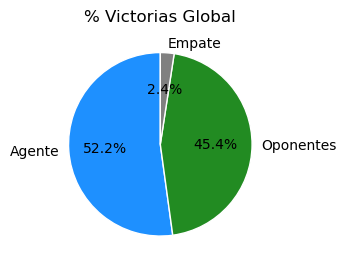

In [33]:
fig, axes = plt.subplots(figsize=(3.5, 3.5))

plt.pie(df['winner'].value_counts(normalize=True).reindex(['agent', 'opponent', 'draw']).replace(np.nan, 0),
        labels=['Agente', 'Oponentes', 'Empate'],
        colors=['dodgerblue', 'forestgreen', 'grey'],
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops=dict(edgecolor='white')
        )

plt.title("% Victorias Global")

# Ajustar diseño
plt.tight_layout()
plt.show()